In [1]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.30/04


In [2]:
# 1. load the c++ code
ROOT.gInterpreter.ProcessLine(".L myfunc.cxx")

# 2.1 call the stack function
result = ROOT.add(3.0, 4.0)
print(result)

7.0


Fitted amp = 397.285, mean = 0.017, sigma = 0.998


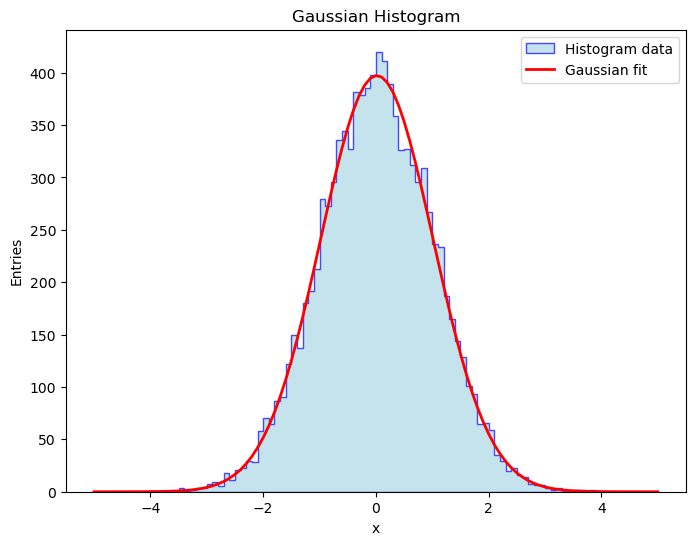

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =       61.518
NDf                       =           72
Edm                       =  1.36713e-08
NCalls                    =           53
Constant                  =      397.285   +/-   4.88931     
Mean                      =    0.0171114   +/-   0.0100312   
Sigma                     =     0.998231   +/-   0.00714033   	 (limited)


Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


In [3]:
# 2.2.1 call the heap function
h = ROOT.make_histogram(10000)

# 2.2.2 extract histogram data for matplotlib
nbins = h.GetNbinsX()
bin_centers = np.array([h.GetBinCenter(i) for i in range(1, nbins+1)]) # only consider 1~N (0, N+1 are under/overflow)
bin_contents = np.array([h.GetBinContent(i) for i in range(1, nbins+1)])
# bin_width = h.GetBinWidth(1)  # cuz uniform bin width
bins_heights = np.repeat(bin_centers, bin_contents.astype(int))
bins_edges = np.linspace(h.GetXaxis().GetXmin(), h.GetXaxis().GetXmax(), nbins+1)

# 2.2.3 plot histogram
plt.figure(figsize=(8,6))
plt.hist(bins_heights, bins=bins_edges, histtype='stepfilled', color='lightblue', edgecolor='blue', alpha=0.7, label='Histogram data')

# 2.2.4 get Gaussian fit parameters
fit_func = h.GetFunction("gaus")
amp = fit_func.GetParameter(0)
mean = fit_func.GetParameter(1)
sigma = fit_func.GetParameter(2)
print(f"Fitted amp = {amp:.3f}, mean = {mean:.3f}, sigma = {sigma:.3f}")

# 2.2.5 plot Gaussian fit
def gaussian(x, amp, mean, sigma):
	return amp * np.exp(-(x - mean)**2 / (2*sigma**2))
y_fit = gaussian(bins_edges, amp, mean, sigma)
plt.plot(bins_edges, y_fit, color='red', linewidth=2, label='Gaussian fit')

plt.xlabel('x')
plt.ylabel('Entries')
plt.title('Gaussian Histogram')
plt.legend()
plt.show()


# delete the histogram to free memory
h.Delete()